In [73]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
%matplotlib inline

In [74]:
# load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# convert the images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the images
x_train /= 255.0
x_test /= 255.0

# one-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("train_X shape: ", x_train.shape)
print("train_y shape: ", y_train.shape)

train_X shape:  (60000, 784)
train_y shape:  (60000, 10)


In [75]:
# the softmax function
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [76]:
# define the logistic regression using SGD
class LogisticRegressionSGD:

  def __init__(self, num_features, num_classes, batch_size, learning_rate, num_epochs, sigma=0.01):
    self.num_classes = num_classes
    self.num_features = num_features
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.w = np.random.normal(0, sigma, (num_features, num_classes))
    self.b = np.zeros(num_classes)
    self.loss_history = []

  def calculate_logits(self, X):
    return X @ self.w + self.b

  def calculate_probs(self, logits):
    return softmax(logits)

  def loss(self, X, Y):
    logits = self.calculate_logits(X)
    probs = self.calculate_probs(logits)
    return -np.mean(np.sum(Y * np.log(probs), axis=1))

  def compute_gradients(self, X, Y):
    logits = self.calculate_logits(X)
    probs = self.calculate_probs(logits)
    m = X.shape[0]
    dz = probs - Y
    dW = X.T @ dz / m
    db = np.sum(dz, axis=0) / m
    return dW, db

  def update_parameters(self, dW, db):
    self.w -= self.learning_rate * dW
    self.b -= self.learning_rate * db

  def train(self, X, Y):
    num_examples = X.shape[0]
    num_batches = num_examples // self.batch_size

    for epoch in range(self.num_epochs):
      indicies = np.arange(num_examples)
      np.random.shuffle(indicies)

      X_shuffled = X[indicies]
      Y_shuffled = Y[indicies]

      for i in range(num_batches):
        X_batch = X_shuffled[i * self.batch_size: (i + 1) * self.batch_size]
        Y_batch = Y_shuffled[i * self.batch_size: (i + 1) * self.batch_size]

        dW, db = self.compute_gradients(X_batch, Y_batch)
        self.update_parameters(dW, db)

      current_loss = self.loss(X, Y)
      self.loss_history.append(current_loss)
      print(f"Epoch {epoch + 1}/{self.num_epochs} - Loss: {current_loss:.4f}")

  def accuracy(self, X, Y):
    logits = self.calculate_logits(X)
    probs = self.calculate_probs(logits)
    predictions = np.argmax(probs, axis=1)
    labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predictions == labels) * 100
    return accuracy

In [80]:
# set the random seed
np.random.seed(0)

# get the number of features and classes
num_features = x_train.shape[1]
num_classes = y_train.shape[1]

# hyperparamters
batch_size = 64
learning_rate = 0.01
num_epochs = 50

# build and train the model
model = LogisticRegressionSGD(x_train.shape[1], y_train.shape[1], batch_size, learning_rate, num_epochs)
model.train(x_train, y_train)

Epoch 1/50 - Loss: 0.6255
Epoch 2/50 - Loss: 0.4995
Epoch 3/50 - Loss: 0.4482
Epoch 4/50 - Loss: 0.4185
Epoch 5/50 - Loss: 0.3989
Epoch 6/50 - Loss: 0.3847
Epoch 7/50 - Loss: 0.3736
Epoch 8/50 - Loss: 0.3646
Epoch 9/50 - Loss: 0.3571
Epoch 10/50 - Loss: 0.3509
Epoch 11/50 - Loss: 0.3456
Epoch 12/50 - Loss: 0.3410
Epoch 13/50 - Loss: 0.3368
Epoch 14/50 - Loss: 0.3330
Epoch 15/50 - Loss: 0.3298
Epoch 16/50 - Loss: 0.3267
Epoch 17/50 - Loss: 0.3241
Epoch 18/50 - Loss: 0.3215
Epoch 19/50 - Loss: 0.3191
Epoch 20/50 - Loss: 0.3170
Epoch 21/50 - Loss: 0.3150
Epoch 22/50 - Loss: 0.3132
Epoch 23/50 - Loss: 0.3115
Epoch 24/50 - Loss: 0.3098
Epoch 25/50 - Loss: 0.3082
Epoch 26/50 - Loss: 0.3071
Epoch 27/50 - Loss: 0.3055
Epoch 28/50 - Loss: 0.3041
Epoch 29/50 - Loss: 0.3029
Epoch 30/50 - Loss: 0.3017
Epoch 31/50 - Loss: 0.3006
Epoch 32/50 - Loss: 0.2996
Epoch 33/50 - Loss: 0.2986
Epoch 34/50 - Loss: 0.2976
Epoch 35/50 - Loss: 0.2966
Epoch 36/50 - Loss: 0.2959
Epoch 37/50 - Loss: 0.2948
Epoch 38/5

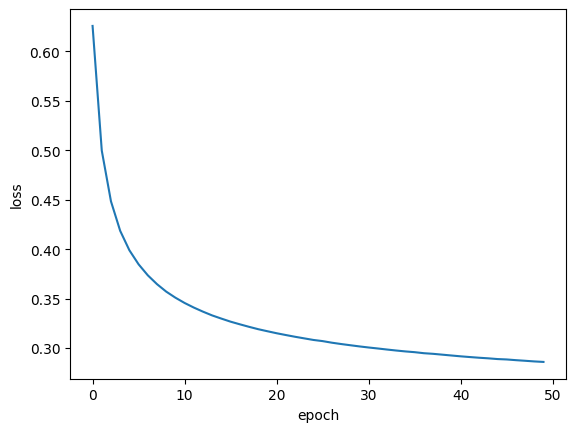

In [81]:
# plot the loss history
plt.plot(model.loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [82]:
# evalute the model
accuracy = model.accuracy(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.14%
